# **Introduction**

Hello,

Welcome to this hands-on exercise notebook, where we will explore a simple yet comprehensive approach to address the famous Titanic disaster through machine learning. This tutorial covers a complete pipeline, guiding you through data cleaning, feature engineering, model development, and parameter tuning. While this tutorial places emphasis on feature engineering and the classification task, it serves as an excellent introduction to the broader realm of machine learning.

## **Overview**

### **1. Problem Statement**
Before we dive into the technical aspects, let's define the problem we're addressing. The goal is to predict whether a passenger survived or not during the Titanic disaster. This is a classic binary classification problem, where the target variable is binary, representing survival (1) or not (0).

### **2. Dataset**
We'll be working with the well-known Titanic dataset. This dataset contains various features about passengers, such as age, class, and ticket fare. The dataset is split into a training set (for model training) and a test set (for model evaluation).

**Download the Dataset:**
Join the competition and download the [dataset](https://www.kaggle.com/competitions/titanic/data) from kaggle.
Make Sure the files are in the same folder as this notebook. 

# **Table of Contents**

## 1. Loading Data and Initial Exploratory Data Analysis (EDA)

In this section, we will focus on loading the dataset and performing some preliminary Exploratory Data Analysis (EDA) to gain insights into the structure and nature of the data. This step is crucial for understanding the characteristics of the dataset before proceeding with further processing.

**Tasks:**
- Load the dataset into a Pandas DataFrame.
- Display basic statistics using `describe()` and investigate the first few rows using `head()`.
- Visualize key features to identify patterns or trends.

## 2. Data Processing

### 2.1 Data Cleaning: Dealing with Null Values

Addressing missing data is a critical step in preparing the dataset for modeling. In this section, we'll explore strategies to handle null values, ensuring our data is ready for the machine learning pipeline.

**Tasks:**
- Identify and analyze missing values.
- Implement appropriate strategies such as imputation or removal.

### 2.2 Feature Engineering and Encoding

Feature engineering involves creating new features or modifying existing ones to enhance the model's performance. Additionally, encoding categorical variables is necessary for many machine learning algorithms. In this section, we'll delve into feature engineering and encoding techniques.

**Tasks:**
- Create relevant features that might contribute to the predictive power of the model.
- Encode categorical variables using techniques like one-hot encoding.

### 2.3 Data Processing Pipeline

Streamlining the data processing steps into a pipeline ensures efficiency and reproducibility. We'll create a comprehensive data processing pipeline to facilitate seamless integration into the modeling phase.

**Tasks:**
- Develop a data processing pipeline to automate the steps performed in 2.1 and 2.2.

## 3. Modeling

### 3.1 Evaluating Models and Making a Choice

Now that the data is prepared, we can move on to the modeling phase. In this section, we'll explore different machine learning models and evaluate their performance using appropriate metrics.

**Tasks:**
- Select a set of classification models.
- Evaluate model performance using metrics like accuracy, precision, and recall.

### 3.2 Hyperparameter Tuning and Combining Models

Fine-tuning model hyperparameters can significantly improve performance. Additionally, combining multiple models can enhance predictive power. This section will focus on hyperparameter tuning and model combination strategies.

**Tasks:**
- Perform hyperparameter tuning using techniques like GridSearchCV.
- Explore ensemble methods for model combination.

## 4. Results

The final step involves preparing the results. This includes generating predictions on the test set.

**Tasks:**
- Generate predictions on the test set using the chosen model.
- For fun you can create a submission file in the required format and submit it on kaggle to get your rank.

In [1]:
# setting up the libraries that we will need 
import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## **1. Loading data and some EDA:**

In [2]:
# loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
#data exploration 1: Get the first 5 rows of the data
ADD CODE HERE

In [4]:
train.select_dtypes(include = ['object']).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mr. Walter",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


The dataset comprises various attributes, each providing valuable information about the passengers on the Titanic. Let's delve into the significance of each attribute:

- **Survived**: This is the target variable. A value of 0 indicates that the passenger did not survive, while a value of 1 denotes survival.

- **Pclass**: This represents the passenger class, providing insights into the socio-economic status of the individual.

- **Name, Sex, Age**: These attributes are self-explanatory, providing details about the passenger's name, gender, and age, respectively.

- **SibSp**: Indicates the count of siblings and spouses accompanying the passenger aboard the Titanic, shedding light on the passenger's family connections.

- **Parch**: Reflects the count of children and parents accompanying the passenger aboard the Titanic, offering insights into family relationships.

- **Ticket**: Represents the unique ticket ID associated with the passenger, providing a means of identifying individuals.

- **Fare**: Indicates the amount paid by the passenger for the ticket, measured in pounds. This serves as an indicator of economic capacity.

- **Cabin**: Specifies the passenger's cabin number, offering information about their accommodation within the ship.

- **Embarked**: Signifies the location where the passenger boarded the Titanic, providing a glimpse into the embarkation point.

Understanding the nuances of each attribute is crucial for effective data analysis and modeling. As we progress through the notebook, we'll leverage these attributes to build a predictive model for survival outcomes during the Titanic disaster.

In [ ]:
#data exploration 2: Get train info

train.ADD CODE HERE

In [ ]:
# Same for test
ADD CODE HERE

The training set exhibits missing values in the Age, Cabin, and Embarked columns, necessitating careful consideration and appropriate handling during the data preprocessing phase.

Similarly, the test set presents missing values in the Age, Cabin, and Fare columns, demanding thoughtful imputation or removal strategies to ensure the dataset's completeness and suitability for subsequent modeling steps.

Addressing these missing values effectively is crucial to maintain the integrity and reliability of the dataset, ultimately contributing to the accuracy and robustness of the machine learning models developed in this tutorial. Note that when dealing with medical data (i.e brain data; strategies might differ)

In [1]:
# data exploration 3: Get the number of missing values in the train data
ADD CODE HERE

In [ ]:
# data exploration 4: Get the number of passengers that survived and those that did not
ADD CODE HERE

In [8]:
# Lets make a copy of the data
train_copy = train.copy()
test_copy = test.copy()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlations(data):
    """
    Plot the correlations of features with the 'Survived' target variable.

    Parameters:
    - data: DataFrame, the input dataset

    Returns:
    None
    """
    correlation_matrix = data.corr()
    correlation_with_survival = correlation_matrix["Survived"].sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_with_survival.values, y=correlation_with_survival.index, palette="viridis")

    # Adding annotations
    for i, value in enumerate(correlation_with_survival):
        plt.text(value + 0.01 if value >= 0 else value - 0.05, i, f"{value:.3f}", ha="center", va="center", fontsize=10)

    # Setting plot properties
    plt.title("Correlation with 'Survived'", fontsize=16)
    plt.xlabel("Correlation Coefficient", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()

In [ ]:
# Use the above function on train
ADD CODE HERE

### Parch and SibSp attribute

In [ ]:
# What percentage of passengers have Parch values equal to 0, and what percentage have SibSp values equal to 0 in the training dataset?
ADD CODE HERE
ADD CODE HERE

The prevalence of Parch and SibSp values at 0 suggests a predominant absence of parents/children and siblings/spouses among passengers. Independently, these attributes exhibit limited correlation with the target variable, signifying a potential challenge in extracting meaningful insights.

However, recognizing the importance of familial context, combining these attributes offers an opportunity to derive a more informative feature. Introducing a novel attribute named "Family Size" allows us to categorize passengers into three meaningful groups: Small, Medium, and Large. Additionally, an "Alone" category is introduced for passengers without any family members aboard the ship.

This consolidation not only simplifies the dataset but also captures the essence of familial relationships, potentially enhancing the model's ability to discern patterns related to survival outcomes.

### Cabin Attribute


In [5]:
#What percentage of missing values does the 'Cabin' attribute have in the training and test datasets?
ADD CODE HERE 
ADD CODE HERE

While it holds true that a significant portion of the 'Cabin' attribute contains missing values, outright dropping this feature is not advisable. This is because certain cabins exhibit distinct survival rates, suggesting that cabin location could be a contributing factor. For instance, cabins situated closer to the surface might have higher survival rates.

After conducting further research, it has come to light that the first letter of the 'Cabin' values corresponds to the decks where the cabins are situated. Leveraging this insight, we plan to transform the 'Cabin' attribute into a new 'Deck' attribute. This transformation allows us to explore the relationship between cabin location (deck) and survival rates more comprehensively.

In [ ]:
# Create a new attribute named 'Deck' for both the training and test datasets by extracting the first letter from the 'Cabin' values. If the 'Cabin' value is null, assign 'X' to the 'Deck' attribute.
ADD CODE HERE
ADD CODE HERE

In [6]:
# What is the count of passengers for each combination of 'Deck' and 'Pclass' in the 'train_copy' dataset?

In [7]:
# What is the count of passengers for each combination of 'Deck' and 'Pclass' in the 'test_copy' dataset?

If you've seen the movie, you're aware that the decks on the Titanic were segregated, with certain decks designated exclusively for a specific passenger class. Here's a breakdown:
- Decks A, B, and C were reserved solely for 1st class passengers.
- Decks D and E were accessible to passengers across all classes.
- Decks F and G were shared between 2nd and 3rd class passengers.
  
Passengers labeled as 'X' represent missing values in the 'Cabin' feature, making it challenging to determine the real deck allocation for these individuals.

### Age

In [ ]:
#Create a FacetGrid using the 'train' dataset, with separate columns for passengers who survived and those who did not. 
#Map a histogram for the 'Age' attribute in each column to visualize the distribution of ages among survivors and non-survivors.
g = sns.FacetGrid(ADD CODE HERE, ADD CODE HERE)
g = g.map(sns.histplot, ADD CODE HERE)

The distribution of ages appears to follow a Gaussian distribution. Notably, there are discernible differences in the age distribution between the subpopulations of survivors and non-survivors. Specifically, individuals aged between 60 and 80 seem to have lower survival probabilities, while children and young passengers exhibit higher chances of survival.

Considering these patterns, it is prudent to transform the 'Age' feature into categorical groups. This categorical approach aligns with the observed variations in survival probabilities among different age categories, providing a more nuanced representation of the relationship between age and survival outcomes.

### Fare and Embarked

In [ ]:
# Find the number of missing values in the 'Fare' attribute of the train/test dataset.
# Determine the count of missing values in the 'Embarked' attribute of the train/test dataset.

f_train = ADD CODE HERE
e_train = ADD CODE HERE

f_test = ADD CODE HERE
e_test = ADD CODE HERE

# Display the results.
print(f'{f_train} value(s) of Fare attribute and {e_train} value(s) of Embarked attribute are missing in train')
print(f'{f_test} value(s) of Fare attribute and {e_test} value(s) of Embarked attribute are missing in test')

In [ ]:
test[test['Fare'].isnull()]

* The passengers that has a missing value for fare is from class 3 and has 0 family members with him.

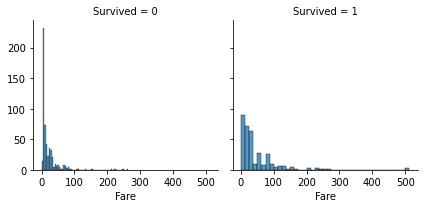

In [18]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.histplot, "Fare")

* Fare distribution is very skewed and might result in badbehaviour in our model. Transforming it into log seems like a good solution.

### Ticket

In [ ]:
# How many unique values does the 'Ticket' attribute have in the given dataset?
ADD CODE HERE

Given the extensive number of unique tickets for analysis, a more manageable approach is to introduce a new attribute, 'ticket_freq,' in lieu of individual tickets. This attribute captures the frequency of each ticket, reducing the complexity of the dataset.

It's worth noting that numerous passengers traveled in groups comprising friends, nannies, maids, and others. While not officially recognized as family units, these individuals shared the same ticket.

### Name

For the 'Name' attribute, a more insightful analysis can be conducted by extracting the title. While extracting family names is a potential avenue, it involves considerable time and complexity. Therefore, I will focus specifically on extracting and analyzing titles for a more efficient and informative approach.

In [20]:
train_copy['Title'] = train_copy['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [9]:
# Provide the distribution of titles within the 'Title' attribute in the 'train_copy' dataset
ADD CODE HERE 

Observing the data, it becomes evident that there are four major categories, and all other titles can be grouped into one of these four. In the upcoming feature engineering section, we will streamline this attribute by creating four distinct categories.

## **2. Data Processing**
### 2.1 Data Cleaning: Addressing Missing Values

Upon scrutiny in the preceding section, we observed that certain attributes exhibit a limited number of missing values, while others surpass the 70% mark. Here, we employ distinct strategies to handle the missing data for each attribute.

* Filling Missing Age Values:
   - Replacing missing numerical values using the median is a common approach. However, given the varying age ranges across passenger classes, we adopt a nuanced approach. Missing values in age will be imputed with the median age corresponding to each class, separately for male and female passengers.

* Handling Missing Fare Values:
   - With only one missing value in the 'Fare' attribute, we opt to fill it with the median fare for 3rd class passengers traveling alone.

* Managing Missing Embarked Values:
   - For the 'Embarked' attribute, the most frequent port, which is 'S,' will be used to fill the missing values.

* Cabin Attribute Treatment:
   - Dealing with the 'Cabin' attribute is deferred to the feature engineering section, where a new attribute will be created.

These tailored approaches ensure a targeted and effective resolution of missing values in preparation for subsequent stages of analysis and modeling.

## MiniTutorial: What are classes and what are they used for?
In programming, a class is a blueprint or a template for creating objects. Objects are instances of a class, and classes define the properties (attributes) and behaviors (methods) that these objects will have. 

Here's a brief overview:

- **Class:** A class is a user-defined data type that encapsulates data and the functions that operate on that data. It serves as a way to bundle data and functionality together.

- **Object:** An object is an instance of a class. It represents a real-world entity and has attributes (characteristics) and methods (functions) associated with it.

- **Attributes:** Attributes are variables that store data. They represent the characteristics or properties of an object.

- **Methods:** Methods are functions that operate on the data stored in the object. They define the behavior of the object.

- **Instance:** Creating an instance of a class means creating an object based on that class. Each instance has its own set of attributes, but it shares the methods defined by the class.

In Python, classes are a fundamental concept in object-oriented programming (OOP) and are widely used for creating reusable and modular code. They enable the organization of code into logical structures, making it easier to manage and understand.

In [22]:
class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculate the median fare for a man in the third class with no family
        self.med_fare_ = X.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
        
        # Identify the most frequent port of embarkation
        self.most_freq_embarked = ADD CODE HERE
        
        return self
    
    def transform(self, X, y=None):
        # Replace missing values of Age with the median Age for each class and sex
        X.Age = X.groupby(['Sex', 'Pclass'])['Age'].apply(lambda z: z.fillna(z.median()))
        
        # Fill the single missing value for Fare with the pre-calculated median
        X.Fare = X.Fare.fillna(self.med_fare_)
        
        # Fill missing Embarked values with the most frequent port
        X.Embarked = X.Embarked.fillna(self.most_freq_embarked)
        
        return X


### 2.2 Feature Engineering:
#### 2.2.1 Creating New Features

This section focuses on transforming existing attributes and introducing new ones to enhance the dataset:

* **Relative On Board Feature:**
  - Combine 'Parch' and 'SibSp' to create a new attribute, 'Relative On Board.'

* **Family Attribute:**
  - Utilize the 'Relative On Board' feature to categorize passengers into:
    - 'Alone' if the passenger has no relatives on board.
    - 'Small' for passengers with 1 or 2 family members.
    - 'Medium' for passengers with 3, 4, or 5 family members.
    - 'Large' for passengers with more than 6 family members.

* **Deck Attribute:**
  - Extract the first letter of the cabin name for each passenger to create the 'Deck' attribute using the 'Cabin' feature.

* **Age Transformation:**
  - Convert the 'Age' attribute from continuous data into a categorical attribute with 8 distinct categories.

* **Fare Transformation:**
  - Apply a logarithmic transformation to the 'Fare' attribute to reduce skewness in the distribution.

* **Ticket Frequency:**
  - Replace the ticket ID with the frequency of each ticket.

* **Title Extraction and IsMarried Attribute:**
  - Extract the 'Title' attribute from the 'Name' attribute and create an 'IsMarried' attribute based on marital status.

These feature engineering steps aim to derive meaningful insights from existing attributes and facilitate the development of robust machine learning models.

In [23]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    """
    Custom Transformer class for performing feature engineering on a DataFrame.
    
    This class implements the fit and transform methods, allowing it to be seamlessly integrated
    into a sklearn pipeline for preprocessing data.
    """

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Combining 'Sibsp' and 'Parch' to create 'RelativesOnboard' and then creating the 'Family' attribute
        X["RelativesOnboard"] = ADD CODE HERE
        X['Family'] = ADD CODE HERE
        
        # Extracting the first letter of each cabin to create the 'Deck' attribute
        X["Deck"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in X['Cabin'] ])  
        
        # Regrouping 'Deck' categories
        X['Deck'] = X['Deck'].replace(['T', 'A', 'B', 'C'], ADD CODE HERE)
        X['Deck'] = X['Deck'].replace(['D', 'E'], ADD CODE HERE)
        X['Deck'] = X['Deck'].replace(['F', 'G'], ADD CODE HERE)
        
        # Transforming 'Age' from continuous data into an attribute with 8 categories
        X["Age"] = pd.cut(X["Age"], bins=[0., 5.0, 15.0, 25.0, 30.0, 40.0, 50.0, 60.0, np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8])
        
        # For 'Fare', applying log transformation to reduce skewness in distribution
        X["Fare"] = X["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
        
        # Replace ticket ID by ticket frequency
        X['Ticket_Frequency'] = X.groupby('Ticket')['Ticket'].transform('count')
        
        # Extract 'Title' attribute from 'Name' and create 'Is_Married' attribute
        X['Title'] = X['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
        X['Is_Married'] = 0
        X.loc[X['Title'] == 'Mrs', 'Is_Married'] = 1
        
        # Grouping 'Title' categories
        X['Title'] = X['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
        X['Title'] = X['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

        return X


#### 2.2.2 Encoding

In this section, we will apply label encoding to the following features:

**Label Encoding:**
- Age
- Fare
- Embarked
- Sex
- Title
- Family
- RelativesOnboard
- Deck

Additionally, we will use OneHotEncoding for the following features:

**OneHotEncoding:**
- Pclass
- Sex
- Deck
- Family
- Title
- Embarked

**Label Encoding:**
Label Encoding is a technique used to convert categorical data into numerical format. In this process, each unique category or label is assigned a unique integer. The assigned integers are often in ascending order based on the alphabetical order of the categories. Label Encoding is suitable for ordinal data where the order among categories matters, as it introduces a numerical representation while preserving the ordinal relationships. However, it's important to note that this encoding might inadvertently imply ordinal relationships in non-ordinal categorical variables.

For example, in the context of the Titanic dataset:
- 'Embarked': {'C', 'Q', 'S'} could be encoded as {'C': 0, 'Q': 1, 'S': 2}.

**One-Hot Encoding:**
One-Hot Encoding is a technique used to represent categorical data in a binary matrix format. Each category is transformed into a binary column, and the presence or absence of the category is indicated by a 1 or 0, respectively. This method is particularly useful for nominal data where there is no inherent order among categories. One-Hot Encoding avoids introducing unintended ordinal relationships and is compatible with machine learning algorithms that require numerical input.

For example, in the context of the Titanic dataset:
- 'Embarked': {'C', 'Q', 'S'} could be one-hot encoded as three separate binary columns: 'Embarked_C', 'Embarked_Q', 'Embarked_S', with values {1, 0, 0}, {0, 1, 0}, {0, 0, 1} indicating the presence of each category.

In summary, Label Encoding assigns a unique integer to each category, while One-Hot Encoding creates binary columns for each category, representing their presence or absence. The choice between these encoding techniques depends on the nature of the categorical data and the requirements of the machine learning algorithm being used.

In [ ]:
class Encoding(BaseEstimator, TransformerMixin):
    """
    Custom Transformer class for performing encoding on selected features in a DataFrame.
    
    This class implements the fit and transform methods, allowing it to be seamlessly integrated
    into a sklearn pipeline for preprocessing data.
    """

    def __init__(self):
        # Initialize OneHotEncoder and LabelEncoder
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Label encoding
        for i in ['Age', 'Fare', 'Embarked', 'Sex', 'Title', 'Family', 'RelativesOnboard', 'Deck']:
            X[i] = self.le.fit_transform(X[i])
        
        # OneHotEncoding
        encoded_features = []
        for cat in ['Deck', 'Age', 'Pclass', 'Sex', 'Title', 'Embarked', 'Family', 'RelativesOnboard']:
            encoded_feat = self.ohe.fit_transform(X[cat].values.reshape(-1, 1)).toarray()
            n = X[cat].nunique()
            cols = ['{}_{}'.format(cat, n) for n in range(1, n + 1)]
            encoded_df = pd.DataFrame(encoded_feat, columns=cols)
            encoded_df.index = X.index
            encoded_features.append(encoded_df)
        
        # Concatenate encoded features with the original DataFrame
        X = pd.concat([X, *encoded_features[:8]], axis=1)
        
        return X

#### 2.3 Data processing pipeline

In [25]:
class ColumnsDrop(BaseEstimator, TransformerMixin):
    """
    Custom Transformer class for dropping specified columns from a DataFrame.
    
    This class implements the fit and transform methods, allowing it to be seamlessly integrated
    into a sklearn pipeline for preprocessing data.
    """

    def __init__(self, attribute_names):
        # Initialize with a list of attribute names to be dropped
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Drop specified columns from the DataFrame
        return X.drop(self.attribute_names, axis=1)

In [26]:
dropped_columns = [ 'RelativesOnboard','Age', 'Sex','Deck', 'Family', 'Embarked', 'PassengerId', 'Pclass', 'Name', 'Ticket','Cabin','Embarked']


Let's create a processing pipeline using scikit-learn's "Pipeline" class. A pipeline is a way to streamline a lot of the routine processes by putting together a sequence of data processing steps. In our case, the pipeline consists of four different custom transformers/steps.

In [27]:
processing_pipeline = ADD CODE HERE([
    ('Filling missing values', Imputer()),
    ('Feature Engineering', FeatureEngineering()),
    ('Encoding', Encoding()),
    ('dropping useless columns', ColumnsDrop(dropped_columns) ),
    
])

In [ ]:
# Create a copy of train and test
X_train= ADD CODE HERE
X_test = ADD CODE HERE
# Use the pipeline to transform the data using fit_transform
X_train = ADD CODE HERE
plot_correlations(X_train)
# Assign the target variable to y_train
y_train = ADD CODE HERE
# DROP THE SURVIVED COLUMN FROM X_train
X_train = X_train.drop('Survived',axis=1 )
# Use the pipeline to transform the test data using transform
X_test = ADD CODE HERE


In machine learning, the `fit_transform` method is used during the training phase to both fit the transformation parameters and apply the transformation to the training dataset, while the `transform` method is used during the testing phase to apply the previously learned transformation to the new, unseen data.

Here's why we use `fit_transform` for training and only `transform` for testing:

1. **Training Phase (`fit_transform`):**
   - During the training phase, the pipeline needs to learn and adapt to the characteristics of the training data. The `fit_transform` method is used to fit the transformers (such as imputers, encoders, etc.) to the training data and simultaneously apply the transformations. This ensures that the statistical properties and mappings learned from the training data are correctly applied to prepare the features for the machine learning model.

   ```python
   # Fitting and transforming the training data
   X_train = processing_pipeline.fit_transform(X_train)
   ```

2. **Testing Phase (`transform`):**
   - In the testing phase, the pipeline has already been fitted and learned from the training data. We want to apply the same transformations to the test data that were learned from the training data. However, we don't want to re-fit the transformers based on the test data, as this would introduce data leakage and compromise the integrity of the evaluation. Instead, we only use the `transform` method, which applies the previously learned transformations without modifying the parameters.

   ```python
   # Transforming the test data using the learned transformations
   X_test = processing_pipeline.transform(X_test)
   ```

This separation between fitting and transforming ensures that the pipeline generalizes well to unseen data and maintains the consistency of the preprocessing steps between the training and testing datasets. It aligns with the principle of keeping the testing phase isolated from the training phase to obtain reliable performance metrics for the machine learning model.

## **3. Modeling**
#### 3.1 Evaluating Models and Making a Choice

In this section, we assess the performance of several well-known models on the dataset and select those that demonstrate high accuracy. To ensure robust evaluation, we employ 10-fold cross-validation to measure performance on the training data. This allows us to make an informed decision based on the models' effectiveness in handling the Titanic dataset.

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


In [ ]:
# Define number of splits for StratifiedKFold and random state
kfold = StratifiedKFold(n_splits=10, random_state=42)

# Initialize a list to store classifiers
classifiers = [
    SVC(random_state=42),
    ADD CODE HERE,
    ADD CODE HERE,
    ADD CODE HERE,
    ADD CODE HERE
]

# Initialize lists to store cross-validation results
cv_results = []

# Perform cross-validation for each classifier
for classifier in classifiers:
    cv_results.append(cross_val_score(ADD CODE HERE, ADD CODE HERE, y=ADD CODE HERE, scoring=ADD CODE HERE, cv=kfold, n_jobs=4))

# Calculate mean and standard deviation of cross-validation results
cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

# Create a DataFrame to display cross-validation results
cv_res = pd.DataFrame({
    "Algorithm": ["SVC", "DecisionTree", "RandomForest", "GradientBoosting", "ExtraTrees"],
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std
})

cv_res

What are the most two promosing models?
Continue your code using them. For us we will be using Random Forest and GB. Feel free to look up sklean website and test other models.

#### 3.2 Hypter parameter tunning and combining models

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = [ 20 ,'auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [32]:
# for details on these HP visit sklearn website
# The number of boosting stages to perform
n_estimators = ADD CODE HERE
# Number of features to consider at every split
max_features = ADD CODE HERE
# Maximum number of levels in tree
max_depth = ADD CODE HERE
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = ADD CODE HERE
# Minimum number of samples required at each leaf node
min_samples_leaf = ADD CODE HERE
# The function to measure the quality of a split
# Create the random grid
gb_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}


In the process of hyperparameter tuning, we use GridSearchCV to systematically search through a specified grid of hyperparameter values for a Random Forest Classifier. Hyperparameters are external configuration settings that are not learned from the data but significantly impact the model's performance. The grid (`rf_param_grid`) contains various combinations of hyperparameters such as the number of estimators, maximum features, maximum depth, minimum samples split, and minimum samples leaf.

The `GridSearchCV` class performs an exhaustive search over the specified hyperparameter values, evaluating each combination using cross-validation. The best-performing model, based on the specified scoring metric (accuracy in this case), is then identified. After fitting the grid search to the training data, the best Random Forest Classifier (`RFC_best`) is obtained with the optimal hyperparameters. The best cross-validated score is displayed to provide insight into the performance improvement achieved through hyperparameter tuning.

In [ ]:
# Random Forest Hyperparameter Tuning
rf = RandomForestClassifier()

# Initialize GridSearchCV for Random Forest
Grid_s_rf = GridSearchCV(rf, param_grid=rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=True)

# Fit the model to find the best hyperparameters
Grid_s_rf.ADD CODE HERE

# Obtain the best estimator with optimal hyperparameters
RFC_best = Grid_s_rf.best_estimator_

# Display the best cross-validated score
Grid_s_rf.best_score_


In [ ]:
# Gradient Boosting Hyperparameter Tuning
gbc = ADD CODE HERE 

# Initialize GridSearchCV for Gradient Boosting
Grid_s_gb = ADD CODE HERE

# Fit the model to find the best hyperparameters
ADD CODE HERE 

# Obtain the best estimator with optimal hyperparameters
GBC_best = ADD CODE HERE

# Display the best cross-validated score
Grid_s_gb.ADD CODE HERE


For each model, we have explored 216 candidate hyperparameter combinations, fitting each configuration over 10 folds, resulting in a total of 2160 fits. From this extensive search, we will identify the top two performing models and then combine their predictions using the ensemble method known as VotingClassifier. This ensemble approach aims to harness the strengths of multiple models, leading to a more robust and potentially higher-performing predictive model.

In [35]:
#Combining 2 models
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('gbc',GBC_best)], voting='soft', n_jobs=-1)
votingC = votingC.ADD CODE HERE

## **4. Submitting results**


In [36]:
predictions = votingC.predict(X_test)
submission = pd.DataFrame({'PassengerId': test.PassengerId,
                           'Survived': predictions})
submission.to_csv('submission.csv', index = False)
# Now you can submit the file to kaggle

# Exercise:
1. Test more models and more Hyper paramaters.
2. Apply more data visualizations techniques.
3. Test different features. Hint: add or drop.
4. Look at feature importance. 